# Pranata Eka Pramudya
# 2109106077
### Posttest 5 
Untuk posttest kali ini, saya mengganti dataset karena dataset sebelumnya tidak memiliki korelasi. Berikut link dari dataset saya : *https://www.kaggle.com/datasets/mexwell/boxing-matches*

In [128]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
import matplotlib.cm as cm


In [129]:
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('boxing_matches.csv')

#### Melakukan Cleaning Data pada Data Null dengan strategy Modus

In [68]:
imputer = SimpleImputer(strategy = 'most_frequent')
df[['age_A']] = imputer.fit_transform(df[['age_A']])
df[['age_B']] = imputer.fit_transform(df[['age_B']])
df[['height_A']] = imputer.fit_transform(df[['height_A']])
df[['height_B']] = imputer.fit_transform(df[['height_B']])
df[['reach_A']] = imputer.fit_transform(df[['reach_A']])
df[['reach_B']] = imputer.fit_transform(df[['reach_B']])
df[['stance_A']] = imputer.fit_transform(df[['stance_A']])
df[['stance_B']] = imputer.fit_transform(df[['stance_B']])
df[['weight_A']] = imputer.fit_transform(df[['weight_A']])
df[['weight_B']] = imputer.fit_transform(df[['weight_B']])
df[['judge1_A']] = imputer.fit_transform(df[['judge1_A']])
df[['judge1_B']] = imputer.fit_transform(df[['judge1_B']])
df[['judge2_A']] = imputer.fit_transform(df[['judge2_A']])
df[['judge2_B']] = imputer.fit_transform(df[['judge2_B']])
df[['judge3_A']] = imputer.fit_transform(df[['judge3_A']])
df[['judge3_B']] = imputer.fit_transform(df[['judge3_B']])

#### Melakukan Cleaning Data pada data duplikat

In [71]:
df.drop_duplicates(inplace = True)

# A. Supervised Learning

### Support Vector Classifier
Karena Label yang digunakan adalah kategorikal, maka saya menggunakan SVC sesuai dengan ketentuan dari posttest.

### Melakukan Standarisasi dan Normalisasi atribut **won_A** dan **kos_A** 

In [72]:
MinMax = MinMaxScaler()
normalisasi = MinMax.fit_transform(df[['won_A']])
normalisasi = MinMax.fit_transform(df[['kos_A']])

In [73]:
ss = StandardScaler()
standarisasi = ss.fit_transform(df[['won_A']])
standarisasi = ss.fit_transform(df[['kos_A']])

#### Membagi Train dan Test pada dataset dengan **won_A** dan **kos_A** pada variabel X. **result** pada variabel y.
Test size dibagi menjadi 20 % dan Train size berjumlah 80 %

In [74]:
X = df[['won_A','kos_A']]
y = df['result']
y = np.where(y == 'win_A', 1, -1)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state = 0)

#### Membuat Objek Model SVM

In [76]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

#### Melakukan prediksi menggunakan object model SVM yang telah dibuat sebelumnya

In [77]:
y_prediksi = svm.predict(X_test)

#### Menghitung Akurasi
Akurasi yang didapatkan dari model SVC ini adalah 92.50 %

In [96]:
accuracy = accuracy_score(y_test, y_prediksi)
print("Akurasi SVC: {:.2f}%".format(accuracy * 100))

Akurasi SVC: 92.50%


### Hasil Prediksi Klasifikasi
#### Confusion Matrix

In [101]:
# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_prediksi)
print(conf_matrix)

[[  0  45]
 [  0 555]]


#### Classification Report

In [130]:
class_report = classification_report(y_test, y_prediksi)
print(class_report)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        45
           1       0.93      1.00      0.96       555

    accuracy                           0.93       600
   macro avg       0.46      0.50      0.48       600
weighted avg       0.86      0.93      0.89       600



## Membuat Plot Untuk Hasil Prediksi

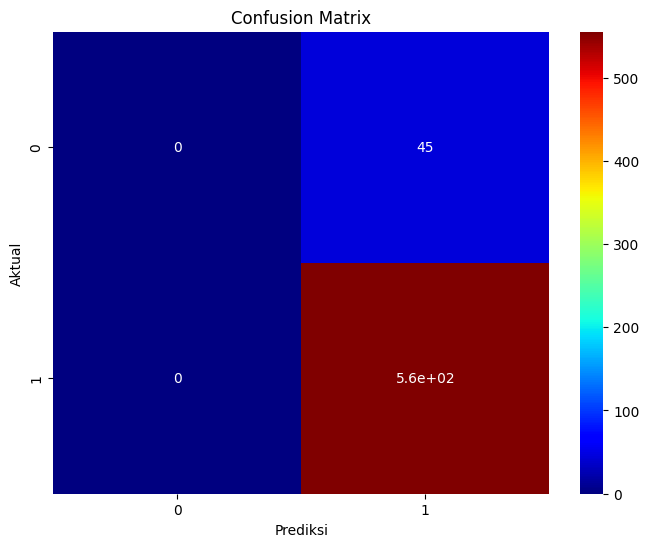

In [107]:
cm = confusion_matrix(y_test, y_prediksi)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="jet")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# B. Unsupervised Learning

## Implementasi Metode K-Means

Nilai K yang digunakan adalah sesuai dengan jumlah target kita, oleh karena itu kita harus mengecek terlebih dahulu jumlah targetnya.

In [108]:
jumlah = df['result'].nunique()
jumlah

3

In [133]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm

df['result'] = pd.to_numeric(df['result'], errors='coerce').fillna(0)
X = df[['won_A', 'kos_A']]

# Menentukan jumlah cluster (K)
K = 3

# Membuat array warna yang sesuai dengan jumlah kluster (K)
colors = cm.get_cmap('rainbow', K)

# Membuat model K-Means
kmeans = KMeans(n_clusters=K)

# Melatih model
kmeans.fit(X)

# Menambahkan kolom 'Cluster' ke DataFrame dengan label cluster
cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels

### Evaluasi Model 
#### Unlabeled Dataset

In [134]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
ss_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.52
Davies-Bouldin Index: 0.66
Calinski-Harabasz Index: 5910.40


#### Pada hasil evaluasi model tanpe label, dapat diketahui bahwa : 
- Silhuette Score memiliki hasil **0.52** yang memiliki arti bahwa hasil clusteringnya cukup baik.
- Davies-Bouldin Index memiliki hasil **0.66** yang memiliki arti bahwa cluster-cluster yang ada cukup bertumpang tindih
- Calinski-Harabasz Index memiliki hasil **5910.40** yang memiliki arti bahwa kepadatan antar cluster sangat baik.

#### Labeled Dataset

In [138]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score 
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score 

cross_tab = pd.crosstab(df["Cluster"], df["result"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

ari = adjusted_rand_score(df["result"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

true_labels_num = df["result"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

homogeneity = homogeneity_score(df["result"], cluster_labels)
completeness = completeness_score(df["result"], cluster_labels)
v_measure = v_measure_score(df["result"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
result    0.0
Cluster      
0        1369
1        1218
2         413 

Adjusted Rand Index (ARI): 0.00
Normalized Mutual Information (NMI): 0.00
Homogeneity Score: 1.00
Completeness Score: 0.00
V-Measure Score: 0.00


#### Dari hasil diatas, dapat diketahui bahwa : 
- Nilai ARI menunjukkan bahwa pengelompokkannya teracak.
- Nilai NMI menunjukkan bahwa kesesuaian tidak sempurna dan berbeda dengan label asli.
- HCV-M menunjukkan bahwa pada homogenitas cluster hanya terdapat dari satu kelas dan semua data dari kelas tersebar di beberapa cluster

## Plot Hasil Clustering

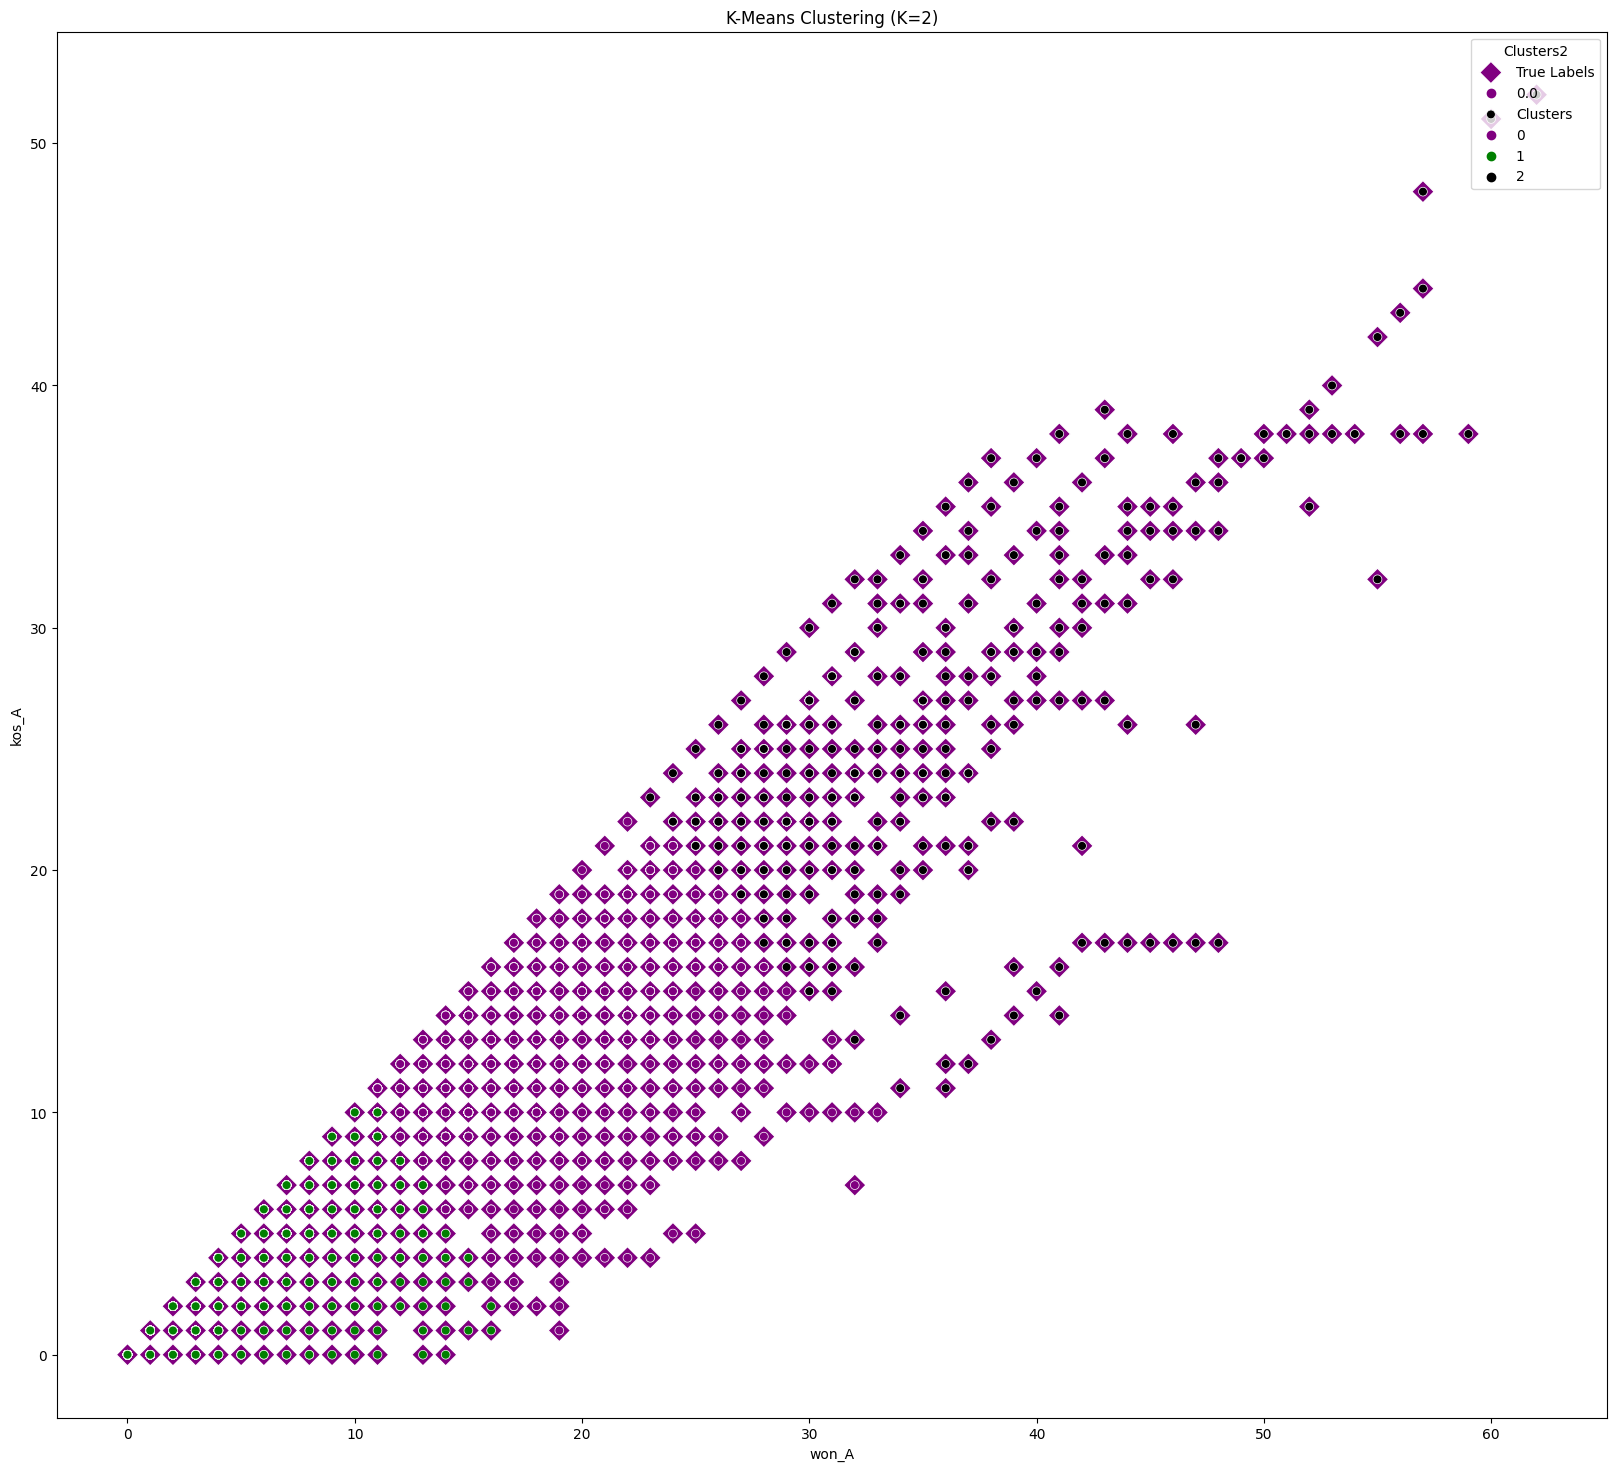

In [142]:
cluster_mapping = {0: 1, 1: 0, 2: 2} 
df["cluster2"] = df["Cluster"].map(cluster_mapping)
plt.figure(figsize=(20,18))
warna = ["purple", "green", "black"]
sns.scatterplot(df, x="won_A", y="kos_A", palette=warna,
hue="result", marker="D", s=130, label="True Labels")

sns.scatterplot(df, x="won_A", y="kos_A", palette=warna,
hue="cluster2", marker="o", s=40, label="Clusters")

plt.title("K-Means Clustering (K=2)")
plt.xlabel("won_A")
plt.ylabel("kos_A")
plt.legend(title="Clusters2", loc="upper right")
plt.show()

Pada Plot di atas, model berhasil tepat sasaran.